# Generally
This Notebook is used to compare generall values by follwing parameters for records:  
mtu = 23,32,64,128,256  
data = 20,32,64,128,256,512  
connection-interval = 36,64,256  

This Notebook provides graphs for initial comparing of the two approaches and printing the associated Data-Tables to the outputs folder

In [314]:
import pandas as pd
import matplotlib
import pprint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [315]:
def format_table_text(latex_text):
    new_str = latex_text 
    new_str = new_str.replace("data\_size","data")
    new_str = new_str.replace("data_size","data")
    new_str = new_str.replace("Data","data")
    new_str = new_str.replace("DATA","data")
    new_str = new_str.replace("data","Data [Byte]")
    new_str = new_str.replace("duration","Duration [µs]")
    new_str = new_str.replace("mtu_size","mtu.")
    new_str = new_str.replace("mtu\_size","mtu.")
    new_str = new_str.replace("MTU","mtu.")
    new_str = new_str.replace("mtu.","MTU [Byte]")
    new_str = new_str.replace("pakets","Pakets")
    new_str = new_str.replace("request\_type","Transfer-Approach")
    new_str = new_str.replace("request_type","Transfer-Approach")
    new_str = new_str.replace("Type","type")
    new_str = new_str.replace("type","Record-Mode")
    new_str = new_str.replace("Interval","ci.")    
    new_str = new_str.replace("conn_interval","ci.")    
    new_str = new_str.replace("conn\_interval","ci.")    
    new_str = new_str.replace("Connection-Interval","ci.")    
    new_str = new_str.replace("ci.","Connection-Interval-Length [ms]")
    return new_str


In [316]:
SAVE_FIG_HCI_OTA_COMPARE = True

In [317]:
df_hci = pd.read_csv("HCI_Output.csv").drop("Unnamed: 0",axis=1)
df_ota = pd.read_csv("OTA_Output.csv").drop("Unnamed: 0",axis=1)

df_hci['type'] = ['HCI']*len(df_hci.index.values)
df_ota['type'] = ['OTA']*len(df_ota.index.values)

print(df_hci.shape,df_ota.shape)
df_all = df_hci.append(df_ota)
df_all.sort_values("starting_time")
print(df_all.columns)
df_all.drop(["data"],inplace=True,axis=1)

request_naming = dict({"WRITE_COMMAND Req":"NOTIFY-Approach","WRITE_COMMAND Rcvd":"NOTIFY-Approach","READ Req":"READ-Approach"})
df_all.replace(request_naming,inplace=True)

(744, 12) (210, 12)
Index(['request_type', 'starting_time', 'ending_time', 'duration', 'data_size',
       'mtu_size', 'conn_interval', 'data', 'read_requests', 'read_responses',
       'notifies', 'type'],
      dtype='object')


In [318]:
def create_str(length):
    standardOutput = "Data Size " + str(length)
    content = ""
    i = len(standardOutput)
    while i < length:
        content += chr(97+(i%26))
        i+=1
    return standardOutput+content

### Value column does not contain all chars of string => can't check validity by data

In [319]:

#df_all['expected_data'] = df_all['data_size'].apply(create_str)
#df_all['is_complete'] = df_all['expected_data'] == df_all['data']
#df_all = df_all[df_all['is_complete']]
#df_all.drop(["data","is_complete","expected_data"],inplace=True,axis=1)
#df_all.groupby(["data_size","mtu_size","conn_interval","request_type","type"]).count()

In [320]:
#pd.set_option('display.max_rows', df_all.shape[0]+1)
#df_all[["type","request_type","data","expected_data","is_complete"]]

In [321]:
df_all['conn_interval'] = df_all['conn_interval'].apply(lambda x:x*1.25)
mtu_values = [23,32,64,128,256]
data_size_values = [20,32,64,128,256,512]
conn_interval_values = [36,64,256]
conn_interval_values = [x*1.25 for x in conn_interval_values]
df_for_this_notebook = df_all[df_all['mtu_size'].apply(lambda x: x in mtu_values)]
df_for_this_notebook = df_for_this_notebook[df_for_this_notebook['data_size'].apply(lambda x:x in data_size_values)]
df_for_this_notebook = df_for_this_notebook[df_for_this_notebook['conn_interval'].apply(lambda x:x in conn_interval_values)]
df_all = df_for_this_notebook
df_all

,request_type,starting_time,ending_time,duration,data_size,mtu_size,conn_interval,read_requests,read_responses,notifies,type
0,NOTIFY-Approach,2021-06-07 13:08:41.922114,2021-06-07 13:08:41.978780,56666,20,23,45.0,0,0,1,HCI
1,NOTIFY-Approach,2021-06-07 13:08:42.861066,2021-06-07 13:08:42.923585,62519,20,23,45.0,0,0,1,HCI
2,NOTIFY-Approach,2021-06-07 13:08:43.548844,2021-06-07 13:08:43.599698,50854,20,23,45.0,0,0,1,HCI
3,NOTIFY-Approach,2021-06-07 13:08:49.032790,2021-06-07 13:08:49.092883,60093,32,23,45.0,0,0,2,HCI
4,NOTIFY-Approach,2021-06-07 13:08:49.886659,2021-06-07 13:08:49.944569,57910,32,23,45.0,0,0,2,HCI
...,...,...,...,...,...,...,...,...,...,...,...
205,READ-Approach,2021-05-26 15:00:17.795512803,2021-05-26 15:00:18.115745203,320232,20,256,320.0,1,1,0,OTA
206,READ-Approach,2021-05-26 15:00:18.755528003,2021-05-26 15:00:19.075769203,320241,20,256,320.0,1,1,0,OTA
207,READ-Approach,2021-05-26 15:00:26.115680803,2021-05-26 15:00:26.435917703,320236,32,256,320.0,1,1,0,OTA
208,READ-Approach,2021-05-26 15:00:31.875806503,2021-05-26 15:00:32.516045403,640238,64,256,320.0,1,1,0,OTA


### Check on Paket amounts

In [322]:
def calc_rec_pakets(row):
    overhead = 1 
    if "NOTIFY" in row['request_type']:
        overhead = 3
    return math.ceil(row["data_size"]/(row["mtu_size"]-overhead))
def check_valid(row):
    if "NOTIFY" in row['request_type']:
        return row["notifies"] == row['expected_receiving_pakets']
    else:
        return row["read_responses"] == row['expected_receiving_pakets']
df_all['expected_receiving_pakets'] = df_all.apply(calc_rec_pakets,axis=1)
df_all['is_valid'] = df_all.apply(check_valid,axis=1)
df_all

,request_type,starting_time,ending_time,duration,data_size,mtu_size,conn_interval,read_requests,read_responses,notifies,type,expected_receiving_pakets,is_valid
0,NOTIFY-Approach,2021-06-07 13:08:41.922114,2021-06-07 13:08:41.978780,56666,20,23,45.0,0,0,1,HCI,1,True
1,NOTIFY-Approach,2021-06-07 13:08:42.861066,2021-06-07 13:08:42.923585,62519,20,23,45.0,0,0,1,HCI,1,True
2,NOTIFY-Approach,2021-06-07 13:08:43.548844,2021-06-07 13:08:43.599698,50854,20,23,45.0,0,0,1,HCI,1,True
3,NOTIFY-Approach,2021-06-07 13:08:49.032790,2021-06-07 13:08:49.092883,60093,32,23,45.0,0,0,2,HCI,2,True
4,NOTIFY-Approach,2021-06-07 13:08:49.886659,2021-06-07 13:08:49.944569,57910,32,23,45.0,0,0,2,HCI,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,READ-Approach,2021-05-26 15:00:17.795512803,2021-05-26 15:00:18.115745203,320232,20,256,320.0,1,1,0,OTA,1,True
206,READ-Approach,2021-05-26 15:00:18.755528003,2021-05-26 15:00:19.075769203,320241,20,256,320.0,1,1,0,OTA,1,True
207,READ-Approach,2021-05-26 15:00:26.115680803,2021-05-26 15:00:26.435917703,320236,32,256,320.0,1,1,0,OTA,1,True
208,READ-Approach,2021-05-26 15:00:31.875806503,2021-05-26 15:00:32.516045403,640238,64,256,320.0,1,1,0,OTA,1,True


In [323]:
df_all = df_all[df_all['is_valid']]
df_all.drop(["read_requests","read_responses","notifies","expected_receiving_pakets","is_valid"],inplace=True,axis=1)
df_all

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,request_type,starting_time,ending_time,duration,data_size,mtu_size,conn_interval,type
0,NOTIFY-Approach,2021-06-07 13:08:41.922114,2021-06-07 13:08:41.978780,56666,20,23,45.0,HCI
1,NOTIFY-Approach,2021-06-07 13:08:42.861066,2021-06-07 13:08:42.923585,62519,20,23,45.0,HCI
2,NOTIFY-Approach,2021-06-07 13:08:43.548844,2021-06-07 13:08:43.599698,50854,20,23,45.0,HCI
3,NOTIFY-Approach,2021-06-07 13:08:49.032790,2021-06-07 13:08:49.092883,60093,32,23,45.0,HCI
4,NOTIFY-Approach,2021-06-07 13:08:49.886659,2021-06-07 13:08:49.944569,57910,32,23,45.0,HCI
...,...,...,...,...,...,...,...,...
205,READ-Approach,2021-05-26 15:00:17.795512803,2021-05-26 15:00:18.115745203,320232,20,256,320.0,OTA
206,READ-Approach,2021-05-26 15:00:18.755528003,2021-05-26 15:00:19.075769203,320241,20,256,320.0,OTA
207,READ-Approach,2021-05-26 15:00:26.115680803,2021-05-26 15:00:26.435917703,320236,32,256,320.0,OTA
208,READ-Approach,2021-05-26 15:00:31.875806503,2021-05-26 15:00:32.516045403,640238,64,256,320.0,OTA


In [324]:
df_tmp = df_all[df_all['type'].str.contains("OTA")].drop(["starting_time","ending_time"],axis=1)
df_tmp["request_type"] = df_tmp["request_type"].apply(lambda x:x.replace("-Approach",""))
text = df_tmp.to_latex(label="table:otaallvalues",caption="Alle Messwerte der OTA-Aufzeichnung",longtable=True)
text = format_table_text(text)
with open("outputs/all_ota_values.tex", "w") as text_file:
    text_file.write(text)

print("save following table:")
df_tmp

save following table:


,request_type,duration,data_size,mtu_size,conn_interval,type
0,READ,45228,20,23,45.0,OTA
1,READ,45227,20,23,45.0,OTA
2,READ,45229,20,23,45.0,OTA
3,READ,135228,32,23,45.0,OTA
4,READ,135231,32,23,45.0,OTA
...,...,...,...,...,...,...
205,READ,320232,20,256,320.0,OTA
206,READ,320241,20,256,320.0,OTA
207,READ,320236,32,256,320.0,OTA
208,READ,640238,64,256,320.0,OTA


### Define Parameters for analyse

In [293]:
filter_big_values = False
show_all_combinations = False # imense calc duration


### Filter Values that are to big

In [294]:
if filter_big_values:
    to_big_indices = []
    for i,df_tmp in df_all.groupby(["conn_interval","data_size","mtu_size"]):
    #    print(i,df_tmp['duration'].values,df_tmp['duration'].mean()*2)
        to_big_indices += list(df_tmp[df_tmp['duration'] > df_tmp['duration'].mean()*2].index.values)
    print("drop: ",to_big_indices)
    df_all = df_all.drop(to_big_indices)


### Reindex each request
For each experiment with the same parameters of mtu, data and connection-interval are more than one tries executed. Therefore these will be numbered, to index them and to compare tries with the same parameters.

In [295]:
total_df = pd.DataFrame()
dfs =[(i[0],i[1],x) for i,x in df_all.groupby(["type","request_type"])]
for record_type,request_type,df in dfs:
    for x,df_t in df.groupby(["data_size","mtu_size","conn_interval"]):
        total_df = total_df.append(df_t.reset_index(drop=True))
total_df.reset_index(inplace=True)
print(total_df)


     index     request_type                  starting_time  \
0        0  NOTIFY-Approach     2021-06-07 13:08:41.922114   
1        1  NOTIFY-Approach     2021-06-07 13:08:42.861066   
2        2  NOTIFY-Approach     2021-06-07 13:08:43.548844   
3        0  NOTIFY-Approach     2021-06-07 13:14:18.634965   
4        1  NOTIFY-Approach     2021-06-07 13:14:19.585687   
..     ...              ...                            ...   
705      0    READ-Approach  2021-05-25 17:04:19.194351969   
706      1    READ-Approach  2021-05-25 17:04:30.074587069   
707      0    READ-Approach  2021-05-26 14:59:30.434666903   
708      0    READ-Approach  2021-05-26 14:58:39.873687203   
709      0    READ-Approach  2021-05-26 14:59:48.354940503   

                       ending_time  duration  data_size  mtu_size  \
0       2021-06-07 13:08:41.978780     56666         20        23   
1       2021-06-07 13:08:42.923585     62519         20        23   
2       2021-06-07 13:08:43.599698     50854    

In [296]:
total_df = total_df[total_df['mtu_size'].apply(lambda mtu:mtu in mtu_values)]
total_df = total_df[total_df['data_size'].apply(lambda mtu:mtu in data_size_values)]
total_df = total_df[total_df['conn_interval'].apply(lambda mtu:mtu in conn_interval_values)]

### Find Request
plot dataframe of experiments with matching parameters

In [297]:
mtu = 23
interval = 256*1.25
data = 512
to_find = total_df
to_find = to_find[to_find["mtu_size"]==mtu]
to_find = to_find[to_find["conn_interval"]==interval]
to_find = to_find[to_find["data_size"]==data]
to_find

,index,request_type,starting_time,ending_time,duration,data_size,mtu_size,conn_interval,type
249,0,NOTIFY-Approach,2021-06-07 15:08:54.899023,2021-06-07 15:08:56.026530,1127507,512,23,320.0,HCI
250,1,NOTIFY-Approach,2021-06-07 15:08:59.329675,2021-06-07 15:09:00.188434,858759,512,23,320.0,HCI
251,2,NOTIFY-Approach,2021-06-07 15:09:02.776607,2021-06-07 15:09:03.707742,931135,512,23,320.0,HCI
538,0,READ-Approach,2021-05-26 14:49:47.954094,2021-05-26 14:50:03.770581,15816487,512,23,320.0,HCI
539,1,READ-Approach,2021-05-26 14:50:05.658551,2021-05-26 14:50:20.730467,15071916,512,23,320.0,HCI
540,2,READ-Approach,2021-05-26 14:50:24.051472,2021-05-26 14:50:39.614211,15562739,512,23,320.0,HCI


### Plot all recoreded Values

In [298]:
if show_all_combinations:
    for param,df_t in total_df.set_index(["type","request_type","index"]).groupby(["conn_interval","data_size","mtu_size"]):
        subplot = df_t.plot(y="duration",kind="barh",title="(interval,data,mtu)=%s"%str(param))
        step = int(interval*1_000)
        subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))

### Show Values in Table
#### and put them into the outputs folder

In [299]:
naming_dict = dict({"data_size":"Data","mtu_size":"MTU","conn_interval":"Interval","type":"Type"})
naming_dict

{'data_size': 'Data',
 'mtu_size': 'MTU',
 'conn_interval': 'Interval',
 'type': 'Type'}

In [300]:
# request Type = Read
min_values_df_read = total_df[total_df["request_type"].str.contains("READ")].drop(["request_type","starting_time","ending_time","index"],axis=1).groupby(["mtu_size","data_size","type","conn_interval"]).min()
min_values_df_read = min_values_df_read.reset_index().rename(columns=naming_dict).set_index(["MTU","Data"]).pivot(columns=["Type","Interval"])
print("Read Records")
min_values_df_read

Read Records


duration                                                       
Type            HCI                              OTA                      
Interval      45.0       80.0        320.0     45.0       80.0       320.0
MTU Data                                                                  
23  20      73269.0   123102.0    353496.0   45227.0    80228.0   320233.0
    32     139901.0   259535.0   1106201.0  135228.0   240231.0   960243.0
    64     275946.0   460007.0   1686002.0  270233.0        NaN  1280329.0
    128    502438.0   895989.0   3580387.0  495234.0   960241.0  3520286.0
    256   1054158.0  1857694.0   7380056.0       NaN  1840252.0        NaN
    512   2121650.0  3844040.0  15071916.0       NaN        NaN        NaN
32  20      56236.0   103795.0    389472.0   45228.0    80230.0   320232.0
    32     145703.0   255653.0   1123170.0  135229.0   240227.0   960242.0
    64     245375.0   427546.0   1618332.0       NaN        NaN        NaN
    128    411711.0   757677.0   2890059.0  405232.0   720235.0  2880286.0
    256    776675.0  1367508.0   5595981.0       NaN        NaN  5440290.0
    512   1592234.0  2730711.0  10659652.0       NaN        NaN        NaN
64  20      50980.0    84214.0    545911.0   45229.0    80228.0   640237.0
    32      52867.0    90532.0    435799.0   45229.0    80228.0   320233.0
    64     145105.0   256061.0   1035640.0  135230.0   240230.0   960242.0
    128    250953.0   451940.0   1659910.0  225226.0        NaN  1920288.0
    256    442451.0   758654.0   2907564.0       NaN   720239.0  2880292.0
    512    791543.0  1387196.0   5633035.0       NaN        NaN  5440350.0
128 20      49995.0   102604.0    362535.0   45228.0    80229.0   320232.0
    32      54135.0   126084.0    454442.0   45228.0    80226.0   320232.0
    64      54121.0   102780.0    351454.0   45229.0    80229.0   320232.0
    128    141430.0   277714.0   1033525.0  135230.0   240223.0   960241.0
    256    238621.0   418554.0   1639610.0  225230.0   400238.0  1600251.0
    512    428060.0   798534.0   3103908.0       NaN        NaN  2880290.0
256 20      70697.0   139947.0    387814.0   45228.0    80230.0   320231.0
    32      71547.0    90963.0    479055.0   45229.0    80228.0   320236.0
    64      52675.0    95351.0    349592.0   45228.0    80229.0   640238.0
    128     52381.0    87878.0    529773.0   45229.0    80229.0        NaN
    256    145589.0   246643.0    987757.0       NaN        NaN        NaN
    512    229459.0   436658.0   1613749.0       NaN        NaN        NaN

In [312]:
text = min_values_df_read.to_latex(label="table:generalreadrecords",caption="Read-Ansatz Messwerte",multicolumn=True,multirow=True,float_format="%.0f")
text = format_table_text(text)
with open("outputs/general_read_measurement_table.tex", "w") as text_file:
    text_file.write(text)
print(text)

\begin{table}
\centering
\caption{Read-Ansatz Messwerte}
\label{table:generalreadrecords}
\begin{tabular}{llrrrrrr}
\toprule
    & {} & \multicolumn{6}{l}{Duration [µs]} \\
    & Record-Mode & \multicolumn{3}{l}{HCI} & \multicolumn{3}{l}{OTA} \\
    & Connection-Interval-Length [ms] &    45.0  &   80.0  &    320.0 &  45.0  &   80.0  &   320.0 \\
MTU [Byte] & Data [Byte] &          &         &          &        &         &         \\
\midrule
\multirow{6}{*}{23} & 20  &    73269 &  123102 &   353496 &  45227 &   80228 &  320233 \\
    & 32  &   139901 &  259535 &  1106201 & 135228 &  240231 &  960243 \\
    & 64  &   275946 &  460007 &  1686002 & 270233 &     NaN & 1280329 \\
    & 128 &   502438 &  895989 &  3580387 & 495234 &  960241 & 3520286 \\
    & 256 &  1054158 & 1857694 &  7380056 &    NaN & 1840252 &     NaN \\
    & 512 &  2121650 & 3844040 & 15071916 &    NaN &     NaN &     NaN \\
\cline{1-8}
\multirow{6}{*}{32} & 20  &    56236 &  103795 &   389472 &  45228 &   80230 &  32

In [302]:
# request Type = Notify
min_values_df_notify = total_df[total_df["request_type"].str.contains("NOTIFY")].drop(["request_type","starting_time","ending_time","index"],axis=1).groupby(["mtu_size","data_size","type","conn_interval"]).min()
min_values_df_notify = min_values_df_notify.reset_index().rename(columns=naming_dict).set_index(["MTU","Data"]).pivot(columns=["Type","Interval"])
print("Notify Records")
min_values_df_notify

Notify Records


duration                
Type          HCI                
Interval    45.0    80.0    320.0
MTU Data                         
23  20      50854   91098  449456
    32      57910  121972  353427
    64      68301   94288  363853
    128     71439   90618  538689
    256     96303  102209  428760
    512    190313  243632  858759
32  20      70195   86152  477701
    32      63641   88570  371780
    64      65969  127970  342486
    128     76997   94547  343840
    256    100547   90441  341126
    512    185727  291987  658157
64  20      54110   83474  329251
    32      61550   91497  390063
    64      66273   97575  332991
    128     61081  103956  378896
    256     66736   91408  335374
    512    169353  192050  380519
128 20      57617   91956  487753
    32      65429  126028  445187
    64      77450  115484  402383
    128     64609   91386  484990
    256     58712  102595  398219
    512    171327  169386  369885
256 20      60418  109327  391153
    32      54131  103560  363281
    64      57827   93222  390177
    128     77668   95115  354940
    256    116121  170353  542359
    512    187063  278145  359408

In [303]:
text = min_values_df_notify.to_latex(label="table:generalnotifyrecords",caption="Notify-Ansatz Messwerte",multicolumn=True,multirow=True)
text = format_table_text(text)
with open("outputs/general_notify_measurement_table.tex", "w") as text_file:
    text_file.write(text)
print(text)

\begin{table}
\centering
\caption{Notify-Ansatz Messwerte}
\label{table:generalnotifyrecords}
\begin{tabular}{llrrr}
\toprule
    & {} & \multicolumn{3}{l}{Duration [µs]} \\
    & Record-Mode & \multicolumn{3}{l}{HCI} \\
    & Connection-Interval-Length [ms] &    45.0  &   80.0  &   320.0 \\
MTU [Byte] & Data [Byte] &          &         &         \\
\midrule
\multirow{6}{*}{23} & 20  &    50854 &   91098 &  449456 \\
    & 32  &    57910 &  121972 &  353427 \\
    & 64  &    68301 &   94288 &  363853 \\
    & 128 &    71439 &   90618 &  538689 \\
    & 256 &    96303 &  102209 &  428760 \\
    & 512 &   190313 &  243632 &  858759 \\
\cline{1-5}
\multirow{6}{*}{32} & 20  &    70195 &   86152 &  477701 \\
    & 32  &    63641 &   88570 &  371780 \\
    & 64  &    65969 &  127970 &  342486 \\
    & 128 &    76997 &   94547 &  343840 \\
    & 256 &   100547 &   90441 &  341126 \\
    & 512 &   185727 &  291987 &  658157 \\
\cline{1-5}
\multirow{6}{*}{64} & 20  &    54110 &   83474 &  32925

## DATA-MTU (HCI)

45.0 NOTIFY
45.0 READ
80.0 NOTIFY
80.0 READ


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


320.0 NOTIFY
320.0 READ


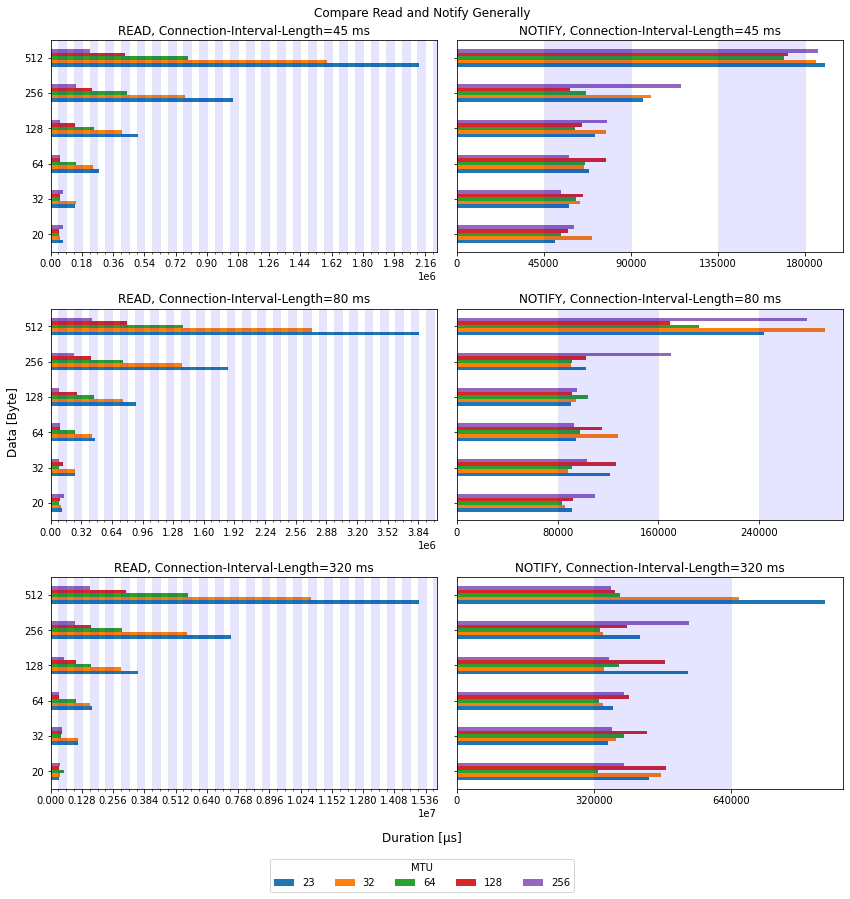

In [304]:
hci_conn_interval_df = total_df[total_df['type'].str.contains("HCI")].groupby("conn_interval")
fig,axs = plt.subplots(len(hci_conn_interval_df),2,figsize=(12,12),sharey=True)
counter = 0
for interval,df_interval in hci_conn_interval_df:
    dfs =[(i,x) for i,x in df_interval.groupby(["request_type"])]
    fig.suptitle("Connection-Interval-Length=%d ms"%(interval))
    for request_type,df in dfs:
        if "READ" in request_type:
            ax = axs[counter][0]
            request_type = "READ"
        else:
            ax = axs[counter][1]
            request_type = "NOTIFY"
        
        print(interval,request_type)
        step = int(interval*1_000)
        df = df.drop(["starting_time","ending_time","type","conn_interval","request_type"],axis=1)
        df_plot = df.groupby(["data_size","mtu_size"]).min().reset_index()
        df_plot = df_plot.pivot(index="data_size",columns=["mtu_size"],values="duration")
        subplot = df_plot.plot(kind="barh",ax=ax,legend=None,xlabel="",ylabel="")
        if math.ceil(int(df['duration'].max())/step) <= 6:
            subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
        elif math.ceil(int(df['duration'].max())/step) <= 10:
            subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
        else:
            subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4*step))
        subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        subplot.set_title("%s, Connection-Interval-Length=%d ms"%(request_type,interval))
        is_label_set = False
        for i in range(step,int(df['duration'].max()),step*2):
            rect = patches.Rectangle((i, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
            subplot.add_patch(rect)
    counter+=1
handles, labels = axs[0][0].get_legend_handles_labels()
#fig.suptitle("%s,Mtu=%d"%(request_type,mtu))
title = fig.suptitle("Compare Read and Notify Generally")
ylabel = fig.supylabel("Data [Byte]")
xlabel = fig.supxlabel("Duration [µs]")
lgd = fig.legend(handles, labels, loc='lower center',title="MTU",bbox_to_anchor=(0.5, -0.05),ncol=len(handles))
plt.tight_layout()
plt.savefig("outputs/general_compare_read_notify", bbox_extra_artists=(lgd,title,ylabel,xlabel), bbox_inches='tight')


Aus dem Notify Ansatz ist zu erkennen, für eine Datenübertragung von wenig Daten dauert die Übertragung nicht sehr lange. Solange es sich nicht um mehr als 2 Notification Pakete handelt kann man davon ausgehen, dass die Übertragung in einem Connection Interval statt findet.

Bei einer Datengröße von 64 Byte fällt auf, dass bei einer MTU von 23 Byte mehr Connection-Interval benötigt werden, als bei den anderen MTU Größen. Vergleicht man die Anzahl der benötigen Notfy Pakete,

## Data-MTU (OTA)

45.0 READ-Approach
80.0 READ-Approach
320.0 READ-Approach


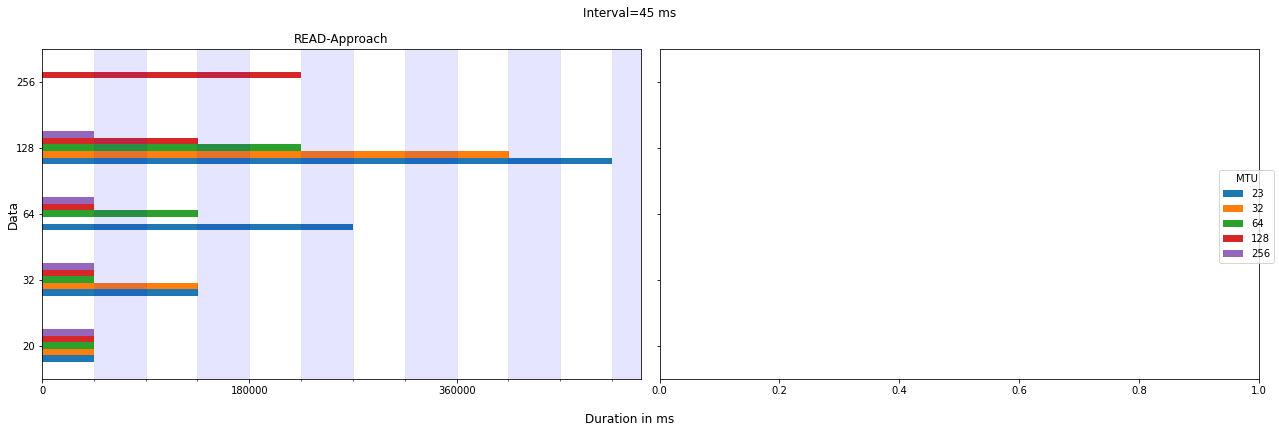

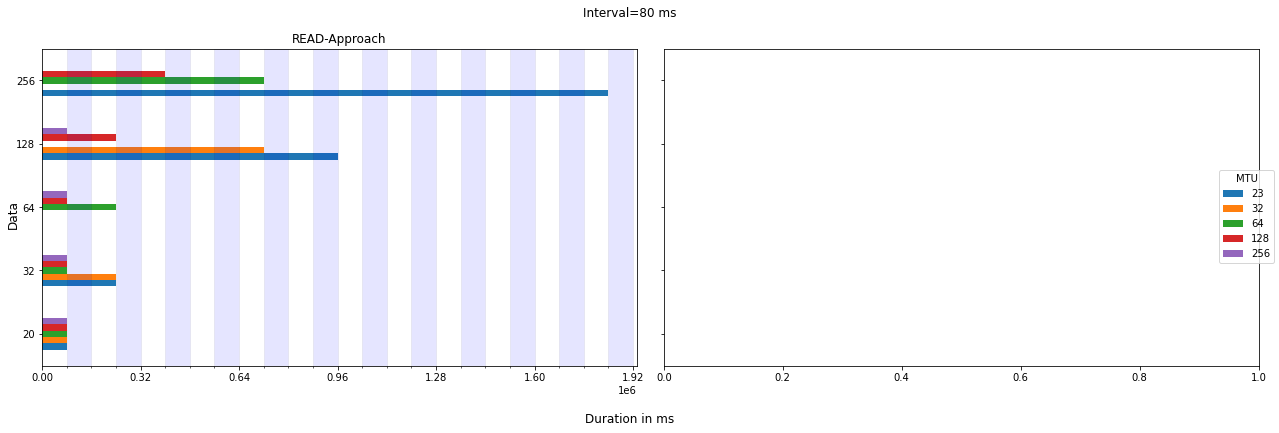

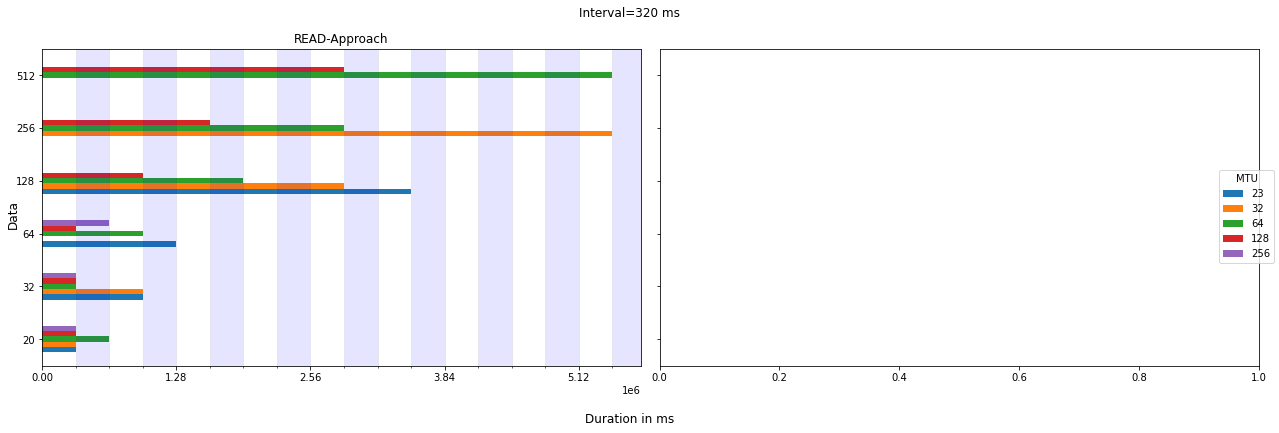

In [305]:
for interval,df_interval in total_df[total_df['type'].str.contains("OTA")].groupby("conn_interval"):
    fig,axs = plt.subplots(1,2,figsize=(18,6),sharey=True)
    dfs =[(i,x) for i,x in df_interval.groupby(["request_type"])]
    fig.suptitle("Interval=%d ms"%(interval))
    for request_type,df in dfs:
        if "READ" in request_type:
            ax = axs[0]
        else:
            ax = axs[1]
        print(interval,request_type)
        step = int(interval*1_000)
        df = df.drop(["starting_time","ending_time","type","conn_interval","request_type"],axis=1)
        df_plot = df.groupby(["data_size","mtu_size"]).min().reset_index()
        df_plot = df_plot.pivot(index="data_size",columns=["mtu_size"],values="duration")
        subplot = df_plot.plot(kind="barh",ax=ax,legend=None,xlabel="",ylabel="")
        if math.ceil(int(df['duration'].max())/step) <= 10:
            subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2*step))
        else:
            subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4*step))
        subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        subplot.set_title("%s"%request_type)
        is_label_set = False
        for i in range(step,int(df['duration'].max()),step*2):
            rect = patches.Rectangle((i, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
            subplot.add_patch(rect)
    
    handles, labels = axs[0].get_legend_handles_labels()
    #fig.suptitle("%s,Mtu=%d"%(request_type,mtu))
    fig.supylabel("Data")
    fig.supxlabel("Duration in ms")
    fig.legend(handles, labels, loc='center right',title="MTU")
    plt.tight_layout()
    

## Data-Interval (HCI)

23 NOTIFY-Approach
data_size        20     32     64     128    256     512
conn_interval                                           
45.0           50854  57910  68301  71439  96303  190313
data_size        20      32     64     128     256     512
conn_interval                                             
80.0           91098  121972  94288  90618  102209  243632
data_size         20      32      64      128     256     512
conn_interval                                                
320.0          449456  353427  363853  538689  428760  858759
23 READ-Approach
data_size        20      32      64      128      256      512
conn_interval                                                 
45.0           73269  139901  275946  502438  1054158  2121650
data_size         20      32      64      128      256      512
conn_interval                                                  
80.0           123102  259535  460007  895989  1857694  3844040
data_size         20       32       64       128 

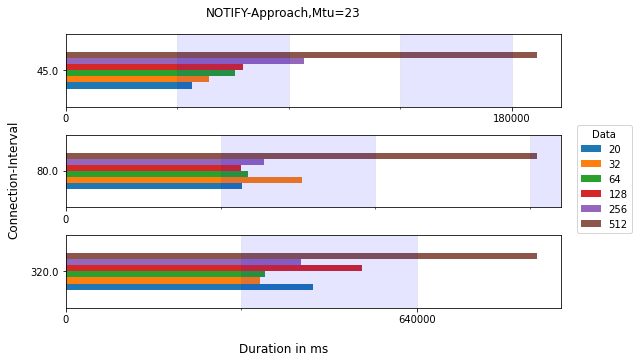

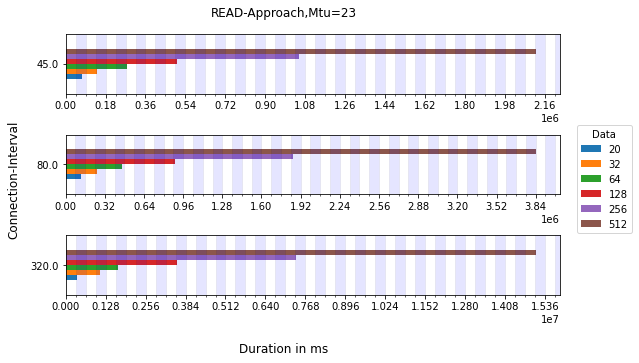

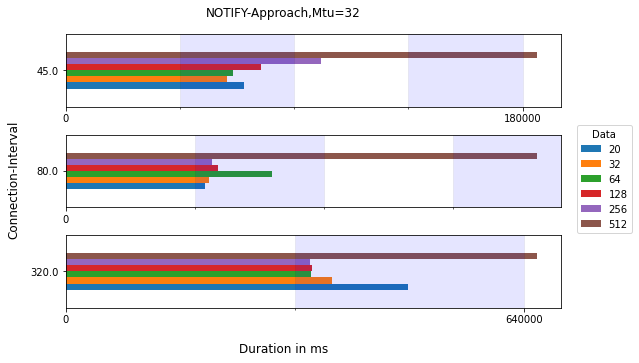

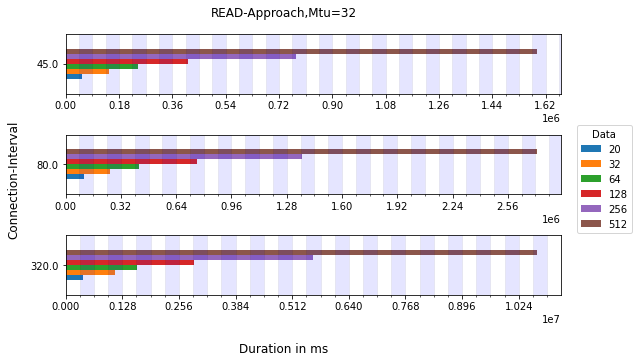

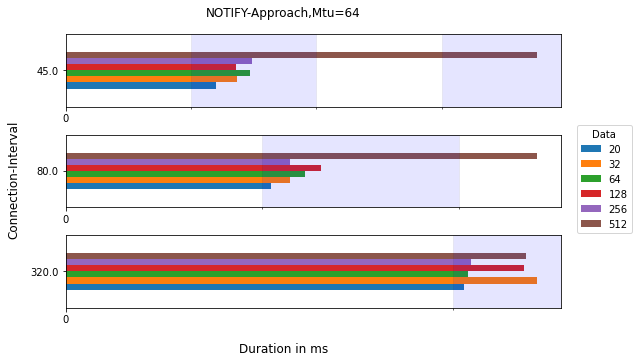

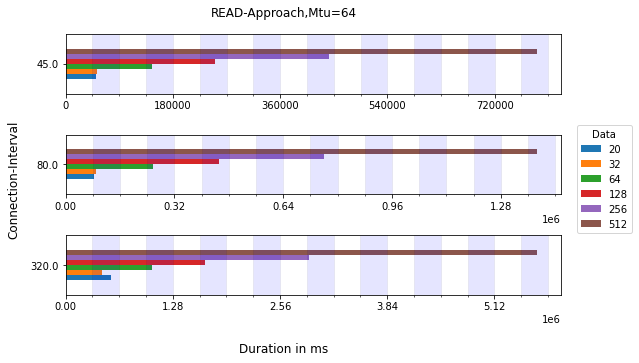

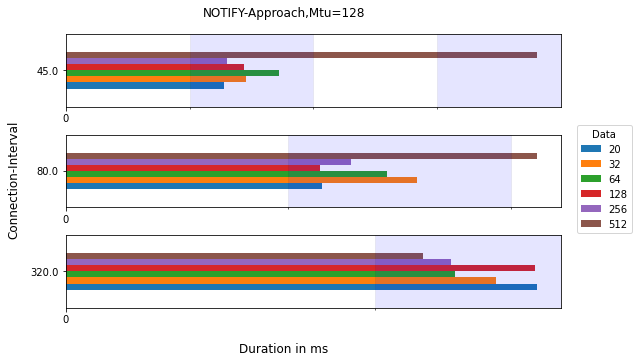

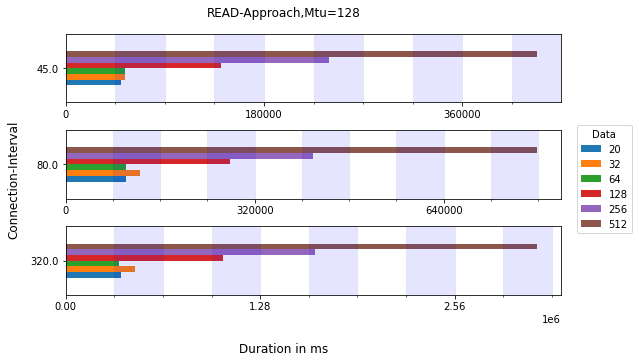

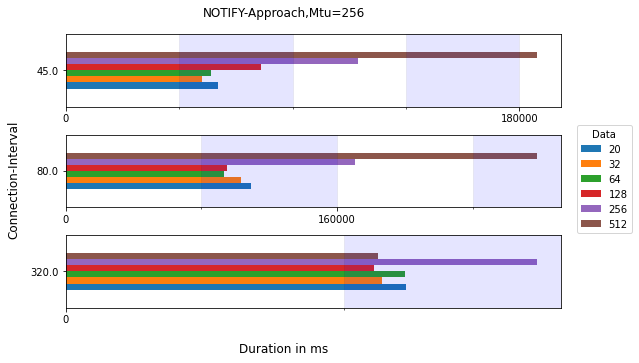

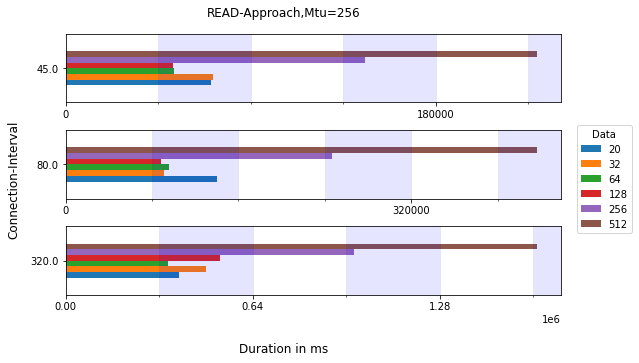

In [306]:
dfs =[(i[0],i[1],x) for i,x in total_df[total_df['type'].str.contains("HCI")].groupby(["mtu_size","request_type"])]
for mtu,request_type,df in dfs:
    print(mtu,request_type)
    df = df.drop(["starting_time","ending_time","type","mtu_size","request_type"],axis=1)
    df_plot = df.groupby(["data_size","conn_interval"]).min().reset_index()
    df_plot = df_plot.pivot(index="conn_interval",columns=["data_size"],values="duration")
    group = [(i,d) for i,d in df_plot.groupby("conn_interval")]
    fig,axes = plt.subplots(len(group),1)
    for i,(interval,df_tmp) in enumerate(group):
        df_tmp.plot(kind="barh",figsize=(8,5),ax=axes[i],legend=None,xlabel="",ylabel="")
        step = int(interval*1_000)
        pprint.pprint(df_tmp)
        if math.ceil(int(df['duration'].max())/step) <= 10:
            axes[i].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2*step))
        else:
            axes[i].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4*step))
        axes[i].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        
        for j in range(step,int(df['duration'].max()),step*2):
            rect = patches.Rectangle((j, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
            axes[i].add_patch(rect)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.suptitle("%s,Mtu=%d"%(request_type,mtu))
    fig.supylabel("Connection-Interval")
    fig.supxlabel("Duration in ms")
    fig.legend(handles, labels, loc='center left',title="Data",bbox_to_anchor=(1, 0.5))
    plt.tight_layout()


## Data-Interval (OTA)

23 READ-Approach
32 READ-Approach
64 READ-Approach
128 READ-Approach
256 READ-Approach


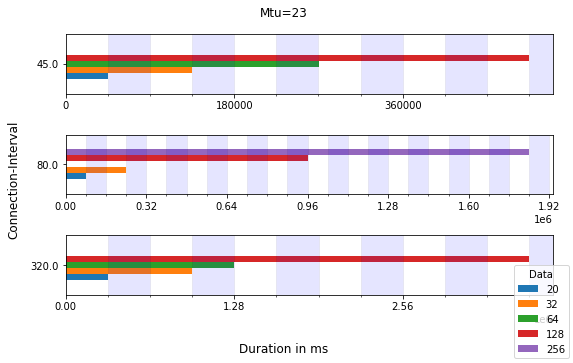

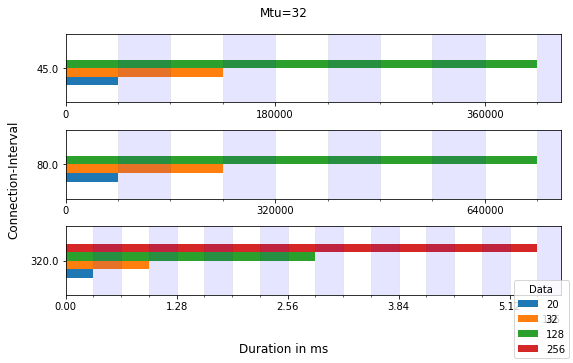

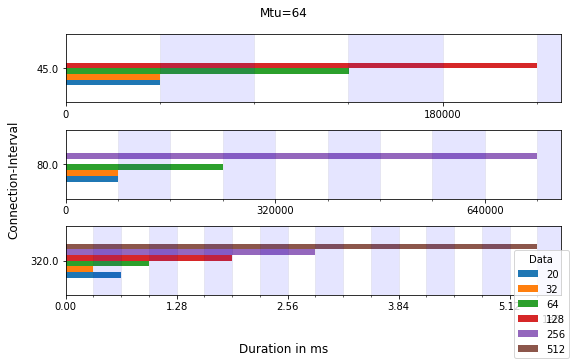

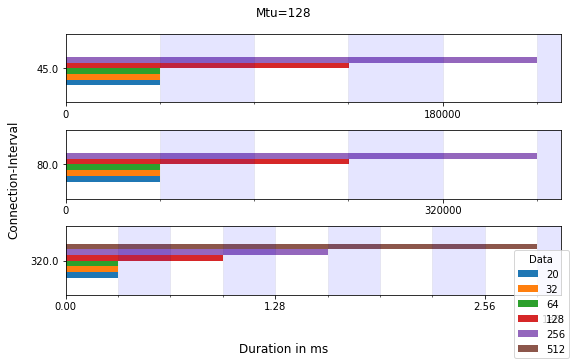

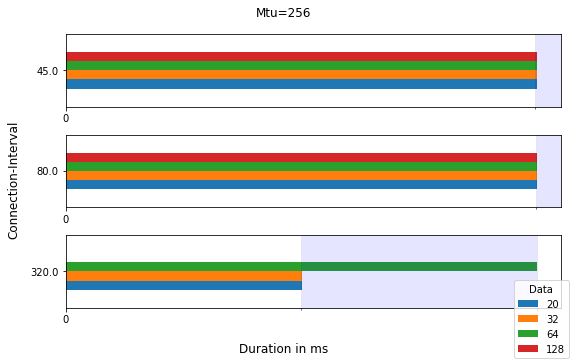

In [307]:
dfs =[(i[0],i[1],x) for i,x in total_df[total_df['type'].str.contains("OTA")].groupby(["mtu_size","request_type"])]
for mtu,request_type,df in dfs:
    print(mtu,request_type)
    df = df.drop(["starting_time","ending_time","type","mtu_size","request_type"],axis=1)
    df_plot = df.groupby(["data_size","conn_interval"]).min().reset_index()
    df_plot = df_plot.pivot(index="conn_interval",columns=["data_size"],values="duration")
    group = [(i,d) for i,d in df_plot.groupby("conn_interval")]
    fig,axes = plt.subplots(len(group),1)
    if(len(group)==1):
        axes=[axes]
    for i,(interval,df_tmp) in enumerate(group):
        df_tmp.plot(kind="barh",figsize=(8,5),ax=axes[i],legend=None,xlabel="",ylabel="")
        step =  int(interval*1_000)
        axes[i].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4*step))
        axes[i].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        for j in range(step,int(df['duration'].max()),step*2):
            rect = patches.Rectangle((j, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
            axes[i].add_patch(rect)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right',title="Data")
    fig.suptitle("Mtu=%d"%mtu)
    fig.supylabel("Connection-Interval")
    fig.supxlabel("Duration in ms")
    plt.tight_layout()

In [308]:
df_all = df_all.groupby(["request_type","data_size","mtu_size","conn_interval","type"]).std().reset_index().set_index(["mtu_size","data_size","request_type"]).pivot(columns=["conn_interval","type"])#.pivot(columns="conn_interval",values="duration")
df_all

duration                 \
conn_interval                               45.0           80.0    
type                                          HCI            HCI   
mtu_size data_size request_type                                    
23       20        NOTIFY-Approach    5832.512009   22415.563730   
                   READ-Approach      6383.406301   12962.577393   
         32        NOTIFY-Approach   29598.652610   18452.658562   
                   READ-Approach      9956.443609   22944.203938   
         64        NOTIFY-Approach   27483.899366   17727.568483   
                   READ-Approach     25468.813976   87894.789829   
         128       NOTIFY-Approach   14649.474132   56049.908656   
                   READ-Approach     15695.186725   54298.936401   
         256       NOTIFY-Approach   20424.427626   14626.099081   
                   READ-Approach     42414.904012  191769.491746   
         512       NOTIFY-Approach   12226.784205   21466.445824   
                   READ-Approach     70259.737292  193069.957488   
32       20        NOTIFY-Approach    4388.493591   32969.641142   
                   READ-Approach     19902.445603   18128.418859   
         32        NOTIFY-Approach   11735.553559   29057.132962   
                   READ-Approach      7522.617918   24706.690113   
         64        NOTIFY-Approach   13422.505218   41086.708301   
                   READ-Approach     28736.537967   25467.255296   
         128       NOTIFY-Approach   10086.855671   23073.771858   
                   READ-Approach     22809.540906   65963.335336   
         256       NOTIFY-Approach   43036.575514   40317.612777   
                   READ-Approach     42453.142762  270948.802236   
         512       NOTIFY-Approach   13195.786714   17917.242012   
                   READ-Approach    168731.477367  153792.228945   
64       20        NOTIFY-Approach   19567.550494   30952.379106   
                   READ-Approach     17226.235718   30293.291540   
         32        NOTIFY-Approach   12232.418989   66886.250114   
                   READ-Approach     30692.749670   26561.781924   
         64        NOTIFY-Approach    9446.003935    7123.662143   
                   READ-Approach     13478.661111    8802.134817   
         128       NOTIFY-Approach   14772.518822   36782.228533   
                   READ-Approach     49499.291025   61331.743369   
         256       NOTIFY-Approach   20013.167324   40512.525623   
                   READ-Approach     41919.172594   61854.355064   
         512       NOTIFY-Approach   72682.825544   18753.933783   
                   READ-Approach     46337.833466   35946.058518   
128      20        NOTIFY-Approach   15190.058800   11087.539372   
                   READ-Approach     16606.606677    7727.668816   
         32        NOTIFY-Approach    9740.010489   55492.095392   
                   READ-Approach     16460.874349   14296.743872   
         64        NOTIFY-Approach   28601.881220   23814.464813   
                   READ-Approach     12114.806409   62731.940073   
         128       NOTIFY-Approach   29730.226073   29348.528908   
                   READ-Approach     21103.899126   42308.557885   
         256       NOTIFY-Approach   13492.055107   32022.532291   
                   READ-Approach     37602.226756  398650.905307   
         512       NOTIFY-Approach    1229.839962   34317.993342   
                   READ-Approach     33640.956392  202968.546066   
256      20        NOTIFY-Approach   12673.862645   15355.783113   
                   READ-Approach     10693.337942   66269.291639   
         32        NOTIFY-Approach   17305.211248   32794.548592   
                   READ-Approach     34460.906000   36002.978340   
         64        NOTIFY-Approach    8732.132290   26727.846571   
                   READ-Approach     16388.267673   90560.214467   
         128       NOTIFY-Approach    5737.284491   18447.144072   
                   READ-Appro

## Vergleich von OTA & HCI
#### & Vergleich von versch. MTU / Daten Größe kombinationen 
VGL Duration OTA / HCI  
Interval = 45    

Index(['request_type', 'duration', 'data_size', 'mtu_size', 'conn_interval',
       'type'],
      dtype='object')
    mtu_size  data_size type  duration
0         23         20  HCI    123102
1         23         20  OTA     80228
2         23         32  HCI    259535
3         23         32  OTA    240231
4         23         64  HCI    460007
5         23        128  HCI    895989
6         23        128  OTA    960241
7         23        256  HCI   1857694
8         23        256  OTA   1840252
9         23        512  HCI   3844040
10        32         20  HCI    103795
11        32         20  OTA     80230
12        32         32  HCI    255653
13        32         32  OTA    240227
14        32         64  HCI    427546
15        32        128  HCI    757677
16        32        128  OTA    720235
17        32        256  HCI   1367508
18        32        512  HCI   2730711
19        64         20  HCI     84214
20        64         20  OTA     80228
21        64         32  HC

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


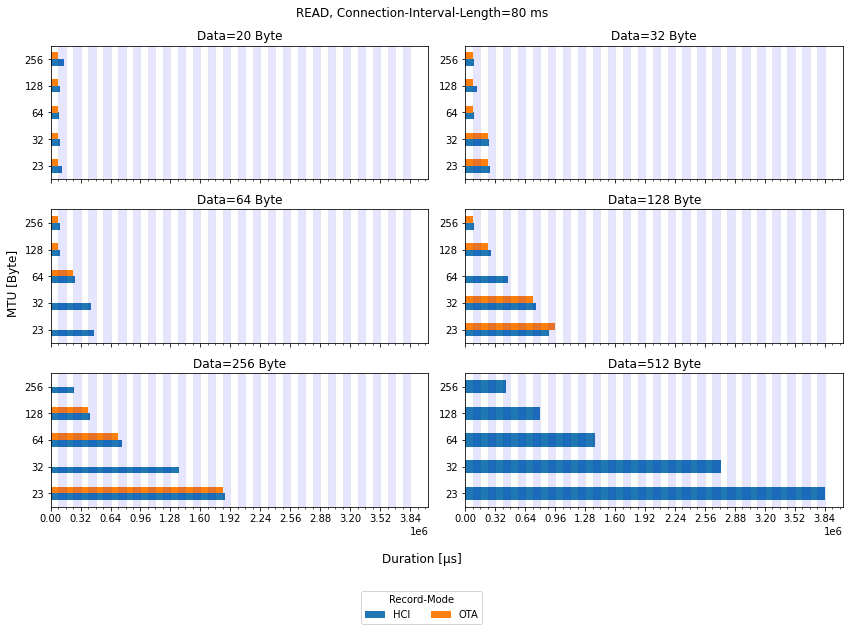

In [309]:
types = "READ"
interval = 64*1.25
df_compare = total_df.drop(["starting_time","ending_time","index"],axis=1)
df_compare['duration'] = df_compare['duration']
print(df_compare.columns)
df_compare = df_compare[df_compare["request_type"].str.contains(types)].drop("request_type",axis=1)
df_compare = df_compare[df_compare["conn_interval"]==interval].drop("conn_interval",axis=1)
df_compare = df_compare.groupby(['mtu_size', 'data_size','type']).min()
df_compare = df_compare.reset_index()
#df_compare.set_index(["conn_interval","mtu_size"]).groupby("type").plot(kind="barh")
print(df_compare)
dataframes = df_compare.groupby("data_size")
fig,axes = plt.subplots(int(len(dataframes)/2),2,sharex=True,figsize=(12,8))
step = int(interval*1_000)
axs = [item for sublist in axes for item in sublist]
axs[0].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step*4))
axs[0].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))

for i,(s,df_tmp) in enumerate(dataframes):
    df_tmp.drop("data_size",axis=1).set_index(["mtu_size"]).pivot(columns="type").plot(kind="barh",ax=axs[i],title="Data=%d Byte"%s,legend=False)
    axs[i].set_ylabel("")
    
for i in range(0,len(axs)):
    for q in range(int(step),int( df_compare['duration'].max()),int(step*2)):
        rect = patches.Rectangle((q, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
        axs[i].add_patch(rect)
        
title = fig.suptitle("READ, Connection-Interval-Length=%d ms"%(interval))
ylabel = fig.supylabel("MTU [Byte]")
xlabel = fig.supxlabel("Duration [µs]")
handles,labels = axs[0].get_legend_handles_labels()
plt.tight_layout()
lgd = fig.legend(handles, [l.split(",")[1][1:-1] for l in labels], loc='lower center',title="Record-Mode",bbox_to_anchor=(0.5, -0.1),ncol=len(handles))
if SAVE_FIG_HCI_OTA_COMPARE:
    #plt.savefig("")
    fig.savefig('outputs/general_hci_ota_compared', bbox_extra_artists=(lgd,title,ylabel,xlabel,), bbox_inches='tight')
plt.show()


Aus diesen Abbildungen geht hervor, dass sich die Aufzeichnungswerte der HCI Traces von den OTA Traces nur minimal unterscheiden. Die Grafiken belgen außerdem, dass die HCI Traces länger als die OTA Traces sind. Das lässt sich dadurch begründen, dass der Befehl Daten einen Read-Request an das andere Gerät zu senden vor dem Absenden des Pakets vom Host and den Bluetooth-Controller gesendet wird. Dieser Moment ist der Begin der Zeitmessung. Erst dannach wird das Paket abgesendet, womit die Zeitmessung mit dem Ubertooth-One beginnt.

An einigen Stellen unterscheiden sich die Werte allerdings, oder es fehlen die Werte für die OTA Traces. Der Grund hierfür ist möglicherweise die Beeinträchtigung des Ubertooth-One durch äußere Einflüsse. Im mit Wireshark aufgezeichneten Trace ist zu sehen, dass einige Pakete nicht aufgezeichnet wurden, obwohl sie versendet wurden, was mit dem HCI Trace nachgewiesen werden kann.

Vor allem geht aber hervor, wie viele Verbindungsintervalle benötigt werden, um die Datenübertragung durchzuführen. Dadurch ist auch zu erkennen, dass die Übertragung bei doppelt so hoher MTU Größe halb so lang dauert. In Fällen, in welchen die Datengröße kleiner als die MTU Größe ist, gilt das logischerweise nicht. Die Abbildung Rechts Oben, mit einer Datengröße von 32 Byte bestätigt diese Annahme. 

Betrachtet man die Verbindungsintervalle genauer, geht außerdem hervor, dass meistens ein Connection-Interval mehr benötigt wird, als erwartet. In der Abbildung für die Datengröße mit 64 Bytes, benötigt ein Read-Request mit einer MTU von 32 Byte sechs und bei 64 Byte zwei Verbindungsintervalle.
Die Ursache hierfür lässt sich in der Betrachtung der einzelnen Pakete finden.

### Vergleich verschiedener Connection intervalle
Datengröße = 512  
MTU = 64  

,duration,data,read_requests,read_responses,notifies
conn_interval,,,,,
36,791543,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
36,882413,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
36,821212,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
64,1440859,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
64,1455459,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
64,1387196,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
256,5668424,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
256,5637733,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0
256,5985934,Data Size 512nopqrstuvwxyzabcdefghijlmnopqrstu...,9,9,0


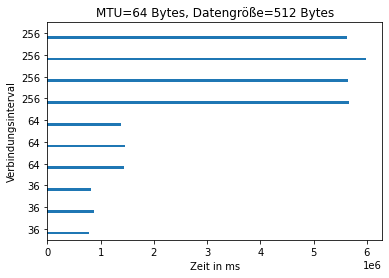

In [310]:
types = "READ"
mtu = 64
data=512
df_compare = df_hci.drop(["starting_time","ending_time","type"],axis=1)
df_compare = df_compare[df_compare["request_type"].str.contains(types)].drop("request_type",axis=1)
df_compare = df_compare[df_compare["mtu_size"]==mtu].drop("mtu_size",axis=1)
df_compare = df_compare[df_compare["data_size"]==data].drop("data_size",axis=1)

#df_compare = df_compare.groupby(['data_size','type']).min()
df_compare.set_index("conn_interval").plot(kind="barh",legend=False)
plt.title("MTU=%d Bytes, Datengröße=%d Bytes"%(mtu,data))
plt.ylabel("Verbindungsinterval")
plt.xlabel("Zeit in ms")
df_compare.set_index("conn_interval")

## Vergleich von READ & NOTIFY

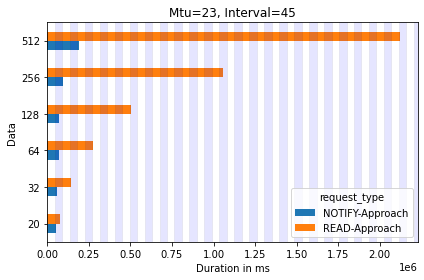

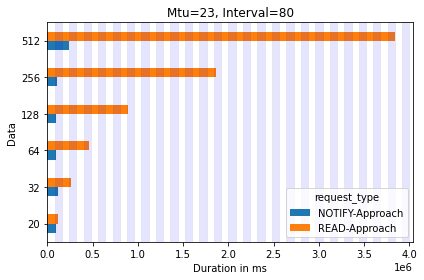

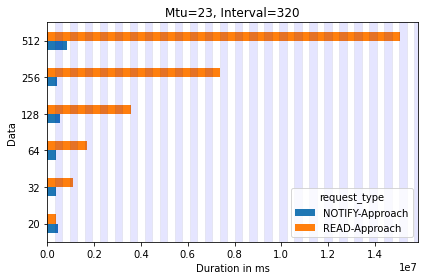

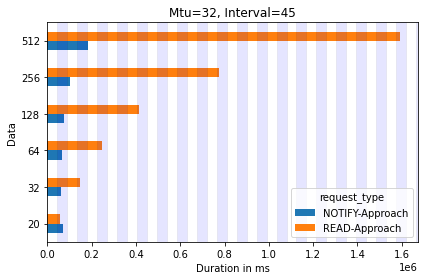

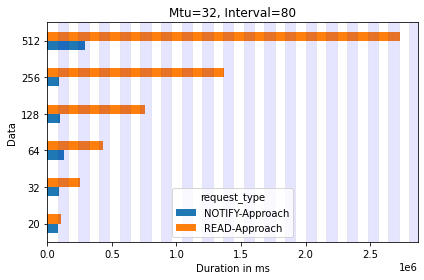

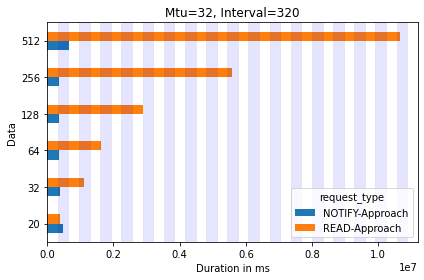

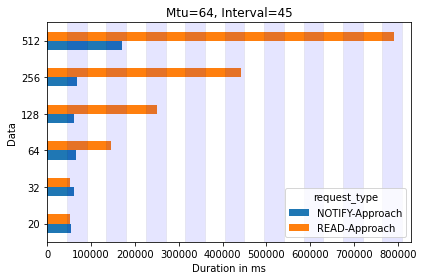

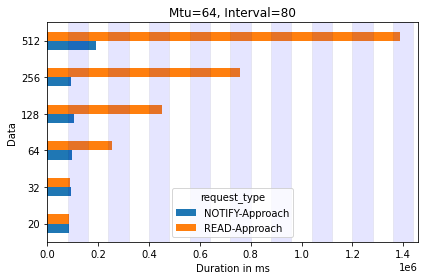

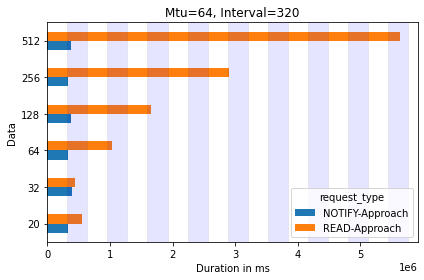

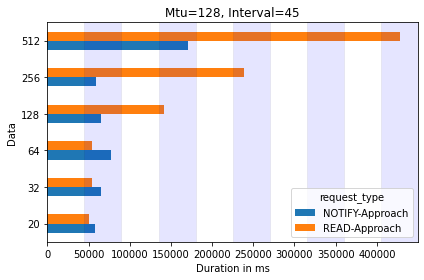

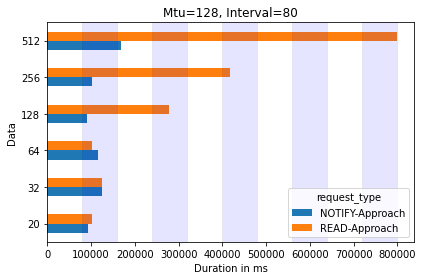

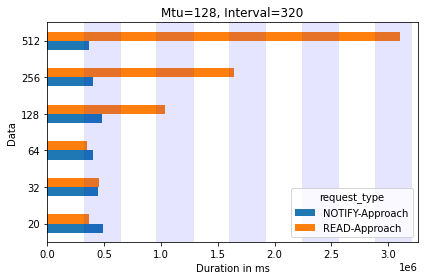

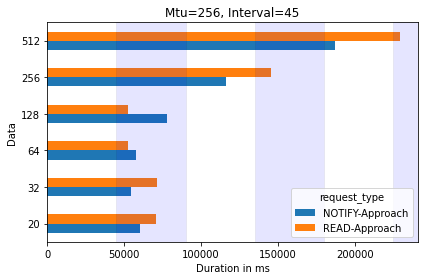

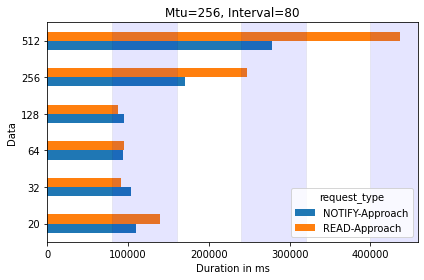

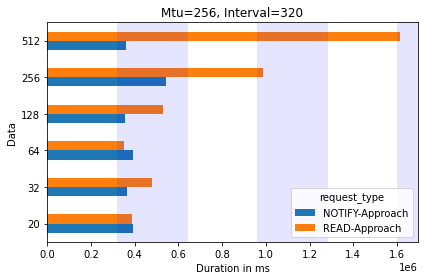

In [311]:
dfs =[(i[0],i[1],x) for i,x in total_df[total_df['type'].str.contains("HCI")].groupby(["mtu_size","conn_interval"])]
for mtu,interval,df in dfs:
    #print(mtu,data_size,interval)
    df = df.drop(["starting_time","ending_time","type","mtu_size","conn_interval"],axis=1)
    requests = set(list(df['request_type'].values))
    if len(requests) == 2:
        #df.set_index("index").pivot(columns="request_type").plot(kind="barh")
        df_plot = df.drop("index",axis=1).groupby(["data_size","request_type"]).min().reset_index()
        subplot = df_plot.set_index("data_size").pivot(columns="request_type",values="duration").plot(kind="barh")
    #.plot("index","duration",kind="barh")
        plt.title("Mtu=%d, Interval=%d"%(mtu,interval))
        plt.ylabel("Data")
        plt.xlabel("Duration in ms")
        plt.tight_layout()
        step = int(interval*1_000)
        for j in range(step,df['duration'].max(),step*2):
            rect = patches.Rectangle((j, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
            subplot.add_patch(rect)